# API 4G/5G

## Quels sont les opérateurs les plus présents en France ? (Régions, Départements) ?

### Récupération de l'API

In [1]:
import requests
import pandas as pd
import json

In [96]:
r = requests.get('https://public.opendatasoft.com/api/records/1.0/search/?dataset=buildingref-france-arcep-mobile-site-2g3g4g&q=&rows=2000&facet=op_name&facet=technology&facet=com_code&facet=com_name&facet=epci_name&facet=epci_code&facet=dep_name&facet=dep_code&facet=reg_name&facet=reg_code')
a_json = r.json()['records']

In [97]:
dataframe = pd.DataFrame(a_json)['fields']
fields = []
for i in range(len(dataframe)):
    fields.append(dataframe[i])

dataframe = pd.DataFrame.from_dict(fields)
dataframe

,site_import,com_code,reg_code,dep_name,site_zb,epci_code,reg_name,geo_point_2d,release_last_quarter_4g,dep_code,geo_shape,op_name,op_code,op_site_id,epci_name,technology,site_dcc,com_name,ept_name,ept_code
0,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.0857721026, 5.8829725065]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8829...",SFR,20810,830157,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN
1,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1010447372, 5.8624116457]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8624...",Bouygues Telecom,20820,T22194,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN
2,non,83129,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1155201286, 5.8244419375]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8244...",SFR,20810,830041,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,Six-Fours-les-Plages,NaN,NaN
3,non,83130,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1983321684, 6.0461154177]",non,83,"{'type': 'MultiPoint', 'coordinates': [[6.0461...",Free Mobile,20815,83130_002,CC de la Vallée du Gapeau,"3G,4G,5G",non,Solliès-Pont,NaN,NaN
4,non,83132,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1736153684, 6.0486123424]",non,83,"{'type': 'MultiPoint', 'coordinates': [[6.0486...",Orange,20801,00017197J5,CC de la Vallée du Gapeau,"2G,3G,4G",non,Solliès-Ville,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,non,75056,11,Paris,non,200054781,Île-de-France,"[48.8570582299, 2.3659869688]",non,75,"{'type': 'MultiPoint', 'coordinates': [[2.3659...",Bouygues Telecom,20820,T96684,Métropole du Grand Paris,"2G,3G,4G",non,Paris,NaN,NaN
9996,non,57070,44,Moselle,oui,200067650,Grand Est,"[49.2392792317, 6.4858008277]",non,57,"{'type': 'MultiPoint', 'coordinates': [[6.4858...",SFR,20810,ZPB57601,CC Houve-Pays Boulageois,"3G,4G",non,Bettange,NaN,NaN
9997,non,57072,44,Moselle,oui,245701354,Grand Est,"[49.2312802543, 6.3125592513]",non,57,"{'type': 'MultiPoint', 'coordinates': [[6.3125...",SFR,20810,ZPB57005,CC de l'Arc Mosellan,"2G,3G,4G",non,Bettelainville,NaN,NaN
9998,non,57075,44,Moselle,non,200039907,Grand Est,"[49.0025088702, 6.2988786273]",non,57,"{'type': 'MultiPoint', 'coordinates': [[6.2988...",SFR,20810,571658,CC du Sud Messin,"2G,3G,4G",non,Beux,NaN,NaN


### Les opérateurs les plus présents en France

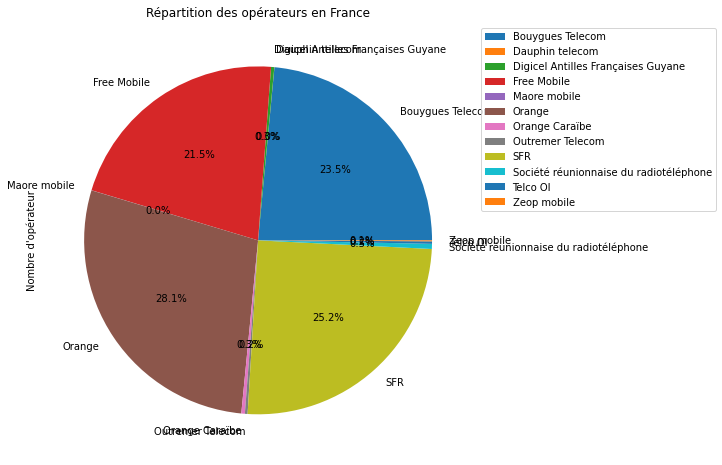

In [107]:
df = dataframe.groupby(['op_name'])
nb_ope = df.count()['op_code']
pie = nb_ope.plot.pie(ylabel='Nombre d\'opérateur', autopct='%1.1f%%', title='Répartition des opérateurs en France', figsize=(15, 8))
pie.legend(bbox_to_anchor=(1.0, 1.0))

### Répartition des opérateurs par région

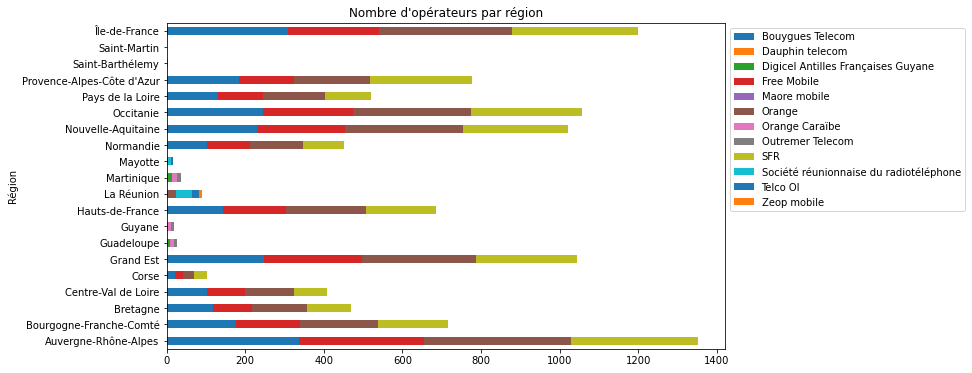

In [120]:
df = dataframe.groupby(['reg_name', 'op_name']).count()['op_code'].unstack().reset_index()
plt = df.plot.barh(stacked=True, figsize=(10, 6), ylabel='Nombre d\'opérateurs', xlabel='Région', x='reg_name', title='Nombre d\'opérateurs par région')
plt.legend(bbox_to_anchor=(1.0, 1.0))

# for rec in plt.patches:
#     height = rec.get_height()
#     plt.text(rec.get_x() + rec.get_width() / 2, 
#               rec.get_y() + height / 2,
#               "{:.0f}%".format(height),
#               ha='center', 
#               va='bottom')

### Répartition des opérateurs par département

<AxesSubplot:title={'center':"Nombre d'opérateurs par département"}, ylabel='Région'>

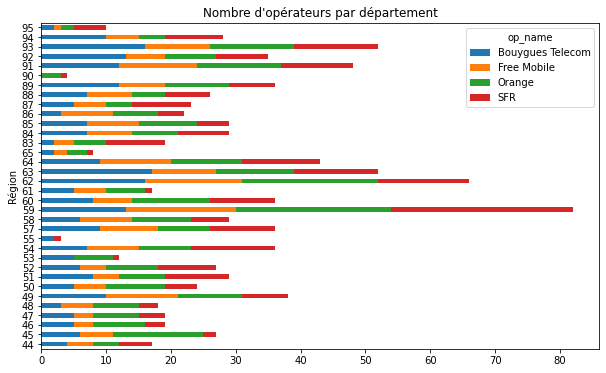

In [70]:
df = dataframe.groupby(['dep_code', 'op_name']).count()['op_code'].unstack().reset_index()
df.plot.barh(stacked=True, figsize=(10, 6), ylabel='Nombre d\'opérateurs', xlabel='Région', x='dep_code', title='Nombre d\'opérateurs par département')